In [1]:
#******************************************************************************************************************************#
# Project    :  Auto Insurance Claim Fraud Detection                                                                           #
# input      :  Policy and Claims Data from Kaggle                                                                             #
# output     :  Predict whether the Auto vehicle claim reported is real or fraud                                               #
# Algorithms :  Naive Bayes, Decision Tree, Random Forest, SVM, Adaboost, XGBoost                                              #
# Metric     :  Accuracy Score, Precision, Recall, F1-score                                                                    #
# Author     :  Pavan Kumar Battula                                                                                            #
#******************************************************************************************************************************#

### Business Objective 
The Main challenge behind Auto insurance Fraud detection in Machine Learning is that we have very less data for fraud claims
compared with the legitimate claims. Frauds were illegal and will incur huge losses to the insurance companies.

The Goal of this project is to build the best model to detect the fraud claims with the better accuaracy.

### The major steps in Auto Insurance classification which discussed in research paper: 
* Step 1: Identify and collect data with necessary attributes 
* Step 2: Perform necessary data cleansing 
* Step 3: Segregate data into training set and testing set 
* Step 4: Select appropriate algorithm 
* Step 5: Execute algorithm with training data 
* Step 6: Evaluate algorithm with testing data 
* Step 7: Satisfactory, use the classifier for new dataset

#### Lets try to implement the above steps and build the Manchine Learning Model to predict the fraudlent claims

## <font  color = Purple > Step 1: Identify and collect data with necessary attributes</font>

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import random as rn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# Loading Data  
data = pd.read_csv('C:/Users/PAVAN REDDY BATTULA/Desktop/UNH/Spring -2022/Machine Learning/Canvas/Project/Insurance_Claims.csv')
data = pd.DataFrame(data)
print("The Top 5 records is shown below ")
data.head()

The Top 5 records is shown below 


months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       10/17/2014           OH   
1                 228   42         342868        6/27/2006           IN   
2                 134   29         687698         9/6/2000           OH   
3                 256   41         227811        5/25/1990           IL   
4                 228   44         367455         6/6/2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip ...  police_report_available total_claim_amount injury_claim  \
0       466132 ...                      YES              71610         6510   
1       468176 ...                        ?               5070          780   
2       430632 ...                       NO              34650         7700   
3       608117 ...                       NO              63400         6340   
4       610706 ...                       NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
#Mapping Fraud_reported Label 'Y' as 1 and 'N' as 0 for model to understand
data['fraud_reported'] = data['fraud_reported'].map({'Y':1,'N':0})
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       10/17/2014           OH   
1                 228   42         342868        6/27/2006           IN   
2                 134   29         687698         9/6/2000           OH   
3                 256   41         227811        5/25/1990           IL   
4                 228   44         367455         6/6/2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip ...  police_report_available total_claim_amount injury_claim  \
0       466132 ...                      YES              71610         6510   
1       468176 ...                        ?               5070          780   
2       430632 ...                       NO              34650         7700   
3       608117 ...                       NO              63400         6340   
4       610706 ...                       NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              1  NaN  
1              1  NaN  
2              0  NaN  
3              1  NaN  
4              0  NaN  

[5 rows x 40 columns]

In [5]:
#Get the data details like shape, features, datatypes
print("The Number of rows are {} and the Number of Columns are {} in the dataset\n".format(data.shape[0],data.shape[1]))
data.info()
data.describe()

The Number of rows are 900 and the Number of Columns are 40 in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 40 columns):
months_as_customer             900 non-null int64
age                            900 non-null int64
policy_number                  900 non-null int64
policy_bind_date               900 non-null object
policy_state                   900 non-null object
policy_csl                     900 non-null object
policy_deductable              900 non-null int64
policy_annual_premium          900 non-null float64
umbrella_limit                 900 non-null int64
insured_zip                    900 non-null int64
insured_sex                    900 non-null object
insured_education_level        900 non-null object
insured_occupation             900 non-null object
insured_hobbies                900 non-null object
insured_relationship           900 non-null object
capital-gains                  900 non-null int64
capital-l

months_as_customer         age  policy_number  policy_deductable  \
count          900.000000  900.000000     900.000000         900.000000   
mean           205.265556   39.026667  545000.175556        1138.333333   
std            115.530308    9.173726  257363.246827         614.097908   
min              0.000000   19.000000  100804.000000         500.000000   
25%            115.750000   32.000000  332885.750000         500.000000   
50%            202.000000   39.000000  527120.500000        1000.000000   
75%            279.250000   45.000000  760309.250000        2000.000000   
max            479.000000   64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count             900.000000    9.000000e+02     900.000000     900.000000   
mean             1258.994322    1.084444e+06  502398.272222   24805.111111   
std               243.904405    2.292218e+06   72298.068327   27994.446384   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1096.690000    0.000000e+00  448692.250000       0.000000   
50%              1260.440000    0.000000e+00  466526.500000       0.000000   
75%              1416.805000    0.000000e+00  603662.250000   50700.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count     900.000000                900.000000                   900.000000   
mean   -26656.555556                 11.558889                     1.842222   
std     28034.938303                  6.951595                     1.019059   
min   -111100.000000                  0.000000                     1.000000   
25%    -51500.000000                  5.750000                     1.000000   
50%    -23250.000000                 12.000000                     1.000000   
75%         0.000000                 17.000000                     3.000000   
max         0.000000                 23.000000                     4.000000   

       bodily_injuries   witnesses  total_claim_amount  injury_claim  \
count       900.000000  900.000000          900.000000    900.000000   
mean          0.998889    1.476667        52681.433333   7417.444444   
std           0.820347    1.108422        26391.535436   4867.388599   
min           0.000000    0.000000          100.000000      0.000000   
25%           0.000000    0.000000        41662.500000   4295.000000   
50%           1.000000    1.000000        58055.000000   6780.000000   
75%           2.000000    2.000000        70530.000000  11205.000000   
max           2.000000    3.000000       114920.000000  21450.000000   

       property_claim  vehicle_claim    auto_year  fraud_reported  _c39  
count      900.000000     900.000000   900.000000      900.000000   0.0  
mean      7421.866667   37842.122222  2005.147778        0.251111   NaN  
std       4857.766789   18835.376126     5.962932        0.433893   NaN  
min          0.000000      70.000000  1995.000000        0.000000   NaN  
25%       4445.000000   30120.000000  2000.000000        0.000000   NaN  
50%       6715.000000   42140.000000  2005.000000        0.000000   NaN  
75%      11040.000000   50727.500000  2010.000000        1.000000   NaN  
max      23670.000000   79560.000000  2015.000000        1.000000   NaN

In [6]:
#Finding the fraudlent records in the dataset
data['fraud_reported'].value_counts()

0    674
1    226
Name: fraud_reported, dtype: int64

#### <font  color = blue > Observations: </font>
* The Data set has 900 records having 40 columns including the 39 features & 1 target variable.
* The column "_c39" have the Null values and can be dropped.
* We can perfrom EDA and can remove some of the unwanted features like policy number, insured_zip etc.. which will not have any contribution to the target variable
* The data contains Numeric, Date, categorical variables.
* The average number on months customer with this company is 202 and age is 39
* We can see only 30% of the fraudlent data in the dataset which seems to be imbalanced data and may need special attention

## <font  color = Purple > Step 2: Perform necessary data cleansing & EDA </font>

In [7]:
print("The Null Values in the data are:\n",data.isnull().sum())

The Null Values in the data are:
 months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage      

In [8]:
columns = data.select_dtypes(include=['object']).columns.drop(['policy_bind_date','insured_occupation','insured_hobbies','insured_relationship','incident_date','incident_location','auto_model'])

In [9]:
for i in columns:
    print("The Value count for {} is".format(i))
    print(data[i].value_counts().reset_index().sort_values(by=['index']))
    print("\n")

The Value count for policy_state is
  index  policy_state
1    IL           311
2    IN           276
0    OH           313


The Value count for policy_csl is
      index  policy_csl
0   100/300         319
1   250/500         314
2  500/1000         267


The Value count for insured_sex is
    index  insured_sex
0  FEMALE          481
1    MALE          419


The Value count for insured_education_level is
         index  insured_education_level
2    Associate                      131
6      College                      113
1  High School                      140
0           JD                      143
3           MD                      130
4      Masters                      129
5          PhD                      114


The Value count for incident_type is
                      index  incident_type
0   Multi-vehicle Collision            379
3                Parked Car             78
1  Single Vehicle Collision            360
2             Vehicle Theft             83


The Value cou

#### <font  color = blue > Observations: </font>
* There are No null values in the dataset except _c39 which will be removed
* Features like collision type, property damage, police report avaiable having '?' for some of the records which needs to impute with proper data 
* Policy is purchased in IL, IN and OH states with almost equal distribution
* Both Male & Female are the policy owners
* Policy Owners Age range from 19 to 64
* Most of the Claims involved vehicle collision rather than Theft or in Parking
* Majority of the claims involved the Major Damage/Total Loss 
* More Incidents were happend in New York and South Carolina states
* Irrespective of the Car Model, claims were reported 
* 70% of the claims were reported as not fraud

In [10]:
#Replacing '?' value with 'No information' rather than deleting or imputing with mode for features collision type,
#property damage and police report available.
#Imputing with mode will may lead to wrong information so decided to create a new category which will be more appropirate for 
#model building`
data['collision_type'] = ['No Information' if i=='?' else i for i in data['collision_type']]
data['property_damage'] = ['No Information' if i=='?' else i for i in data['property_damage']]
data['police_report_available'] = ['No Information' if i=='?' else i for i in data['police_report_available']]

In [11]:
data = data.drop(columns = ['_c39'], axis = 1)

In [12]:
print("The shape of data is", data.shape)

The shape of data is (900, 39)


## <font  color = Purple > Step 2.a:Exploratory Data Analysis </font>

<AxesSubplot:xlabel='age', ylabel='Density'>

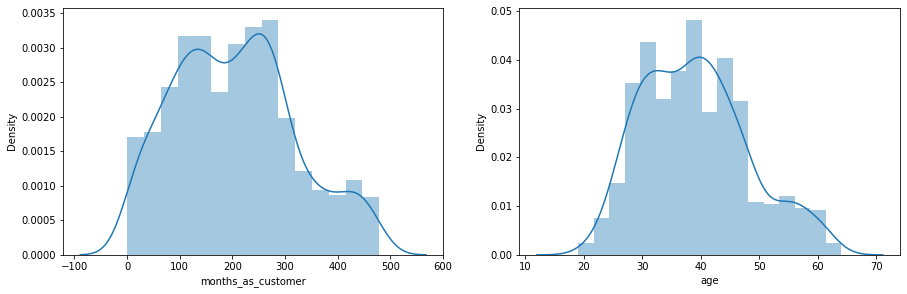

In [13]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.distplot(data['months_as_customer'])
plt.subplot(2,2,2)
sns.distplot(data['age'])

<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

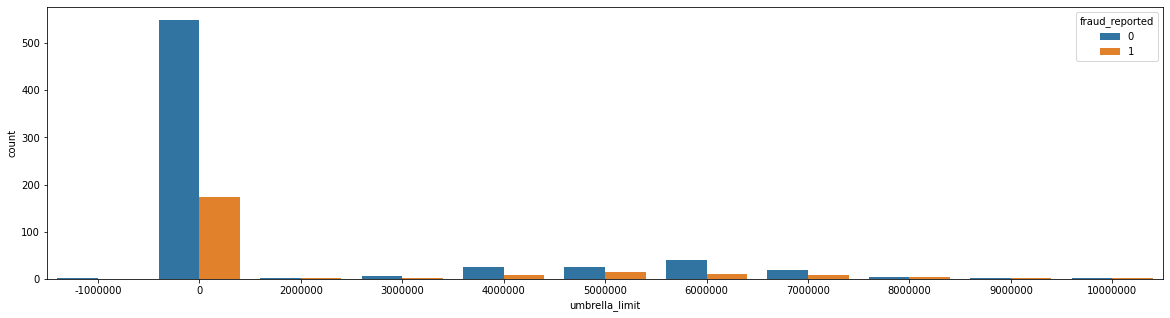

In [14]:
plt.figure(figsize = (20,5))
sns.countplot(data = data, x= data['umbrella_limit'], hue = data['fraud_reported'] )

<AxesSubplot:xlabel='age', ylabel='count'>

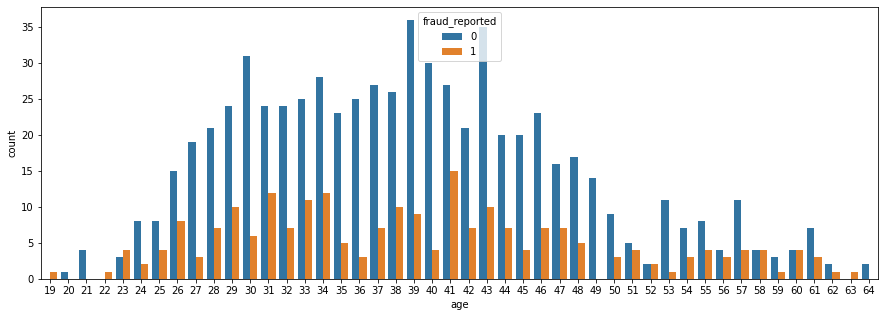

In [15]:
plt.figure(figsize = (15,5))
sns.countplot(data = data, x= data['age'], hue = data['fraud_reported'] )

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

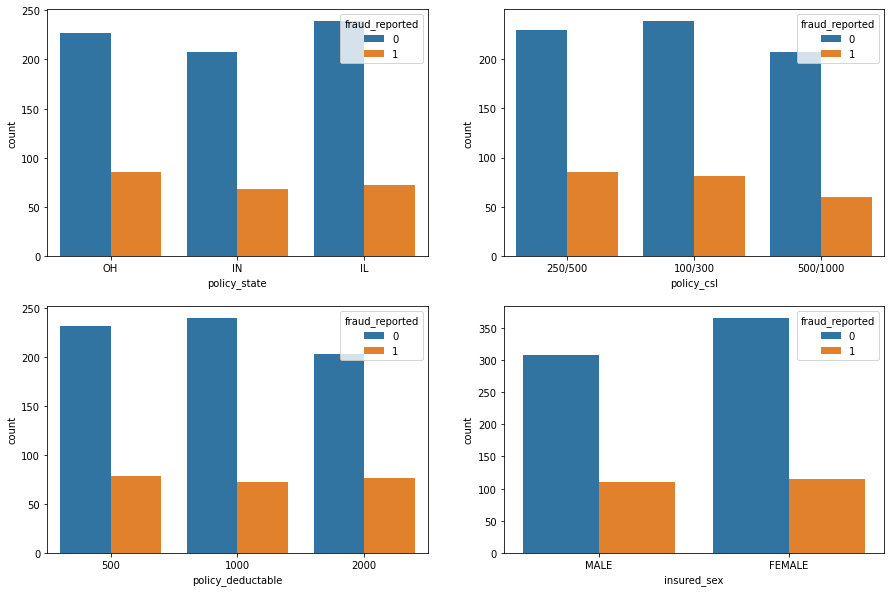

In [16]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.countplot(data = data, x= data['policy_state'], hue = data['fraud_reported'] )
plt.subplot(2,2,2)
sns.countplot(data = data, x= data['policy_csl'], hue = data['fraud_reported'] )
plt.subplot(2,2,3)
sns.countplot(data = data, x= data['policy_deductable'], hue = data['fraud_reported'] )
plt.subplot(2,2,4)
sns.countplot(data = data, x= data['insured_sex'], hue = data['fraud_reported'] )

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

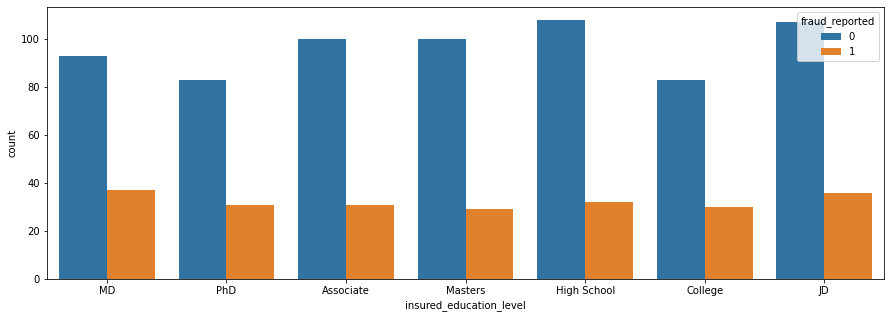

In [17]:
plt.figure(figsize = (15,5))
sns.countplot(data = data, x= data['insured_education_level'], hue = data['fraud_reported'] )

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

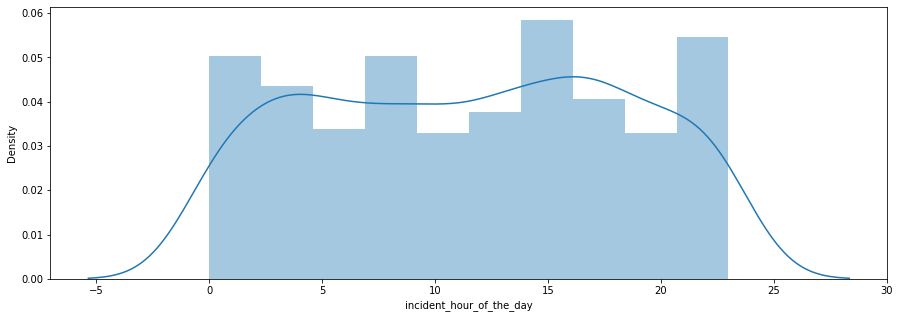

In [18]:
plt.figure(figsize = (15,5))
sns.distplot(data['incident_hour_of_the_day'])

<AxesSubplot:xlabel='witnesses', ylabel='count'>

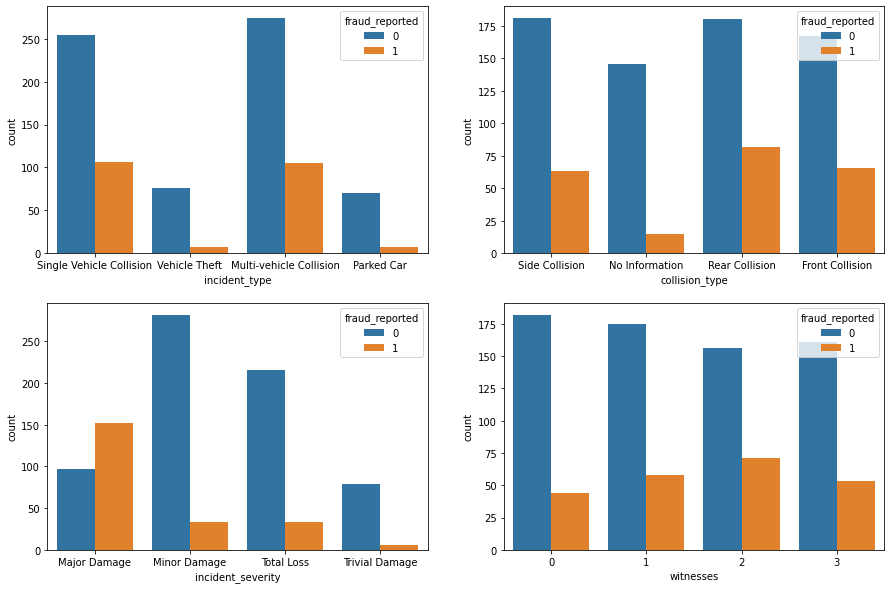

In [19]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.countplot(data = data, x= data['incident_type'], hue = data['fraud_reported'] )
plt.subplot(2,2,2)
sns.countplot(data = data, x= data['collision_type'], hue = data['fraud_reported'] )
plt.subplot(2,2,3)
sns.countplot(data = data, x= data['incident_severity'], hue = data['fraud_reported'] )
plt.subplot(2,2,4)
sns.countplot(data = data, x= data['witnesses'], hue = data['fraud_reported'] )

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

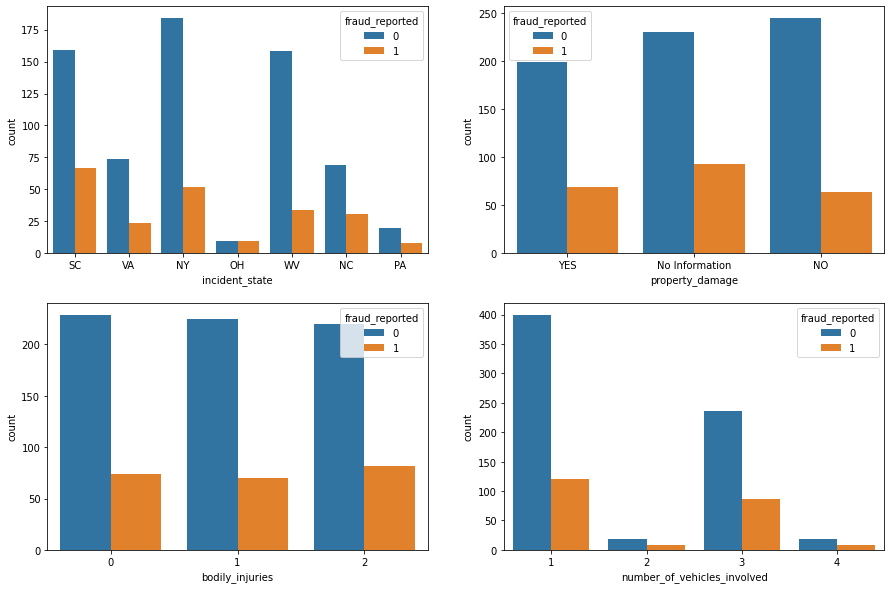

In [20]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.countplot(data = data, x= data['incident_state'], hue = data['fraud_reported'] )
plt.subplot(2,2,2)
sns.countplot(data = data, x= data['property_damage'], hue = data['fraud_reported'] )
plt.subplot(2,2,3)
sns.countplot(data = data, x= data['bodily_injuries'], hue = data['fraud_reported'] )
plt.subplot(2,2,4)
sns.countplot(data = data, x= data['number_of_vehicles_involved'], hue = data['fraud_reported'] )

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

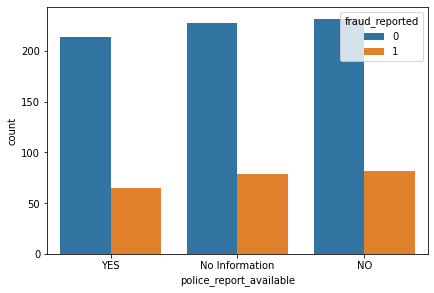

In [21]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.countplot(data = data, x= data['police_report_available'], hue = data['fraud_reported'] )

<AxesSubplot:>

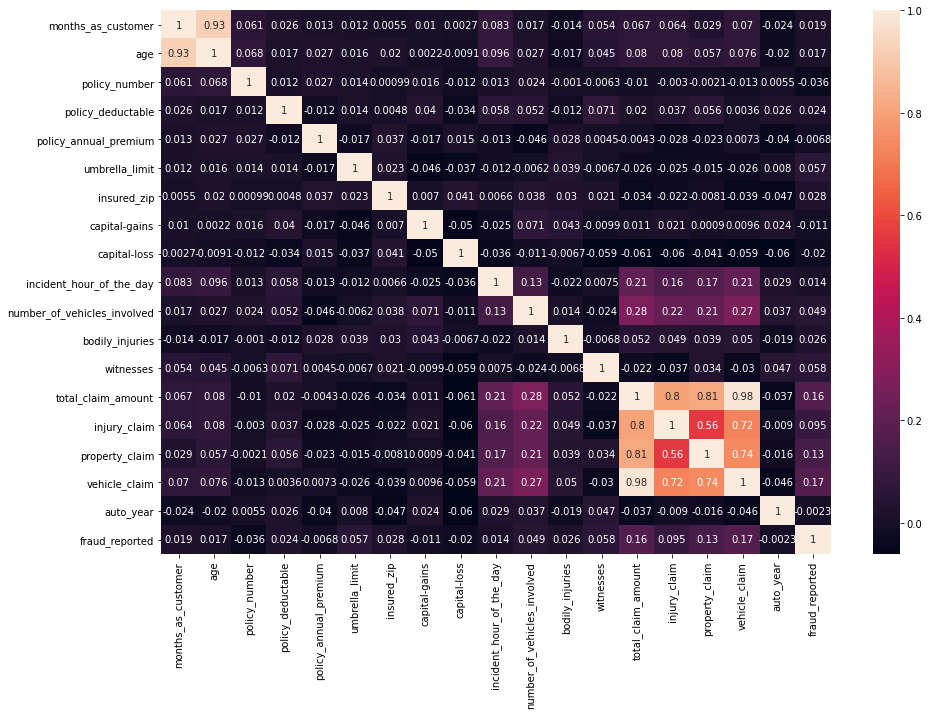

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(),annot = True)

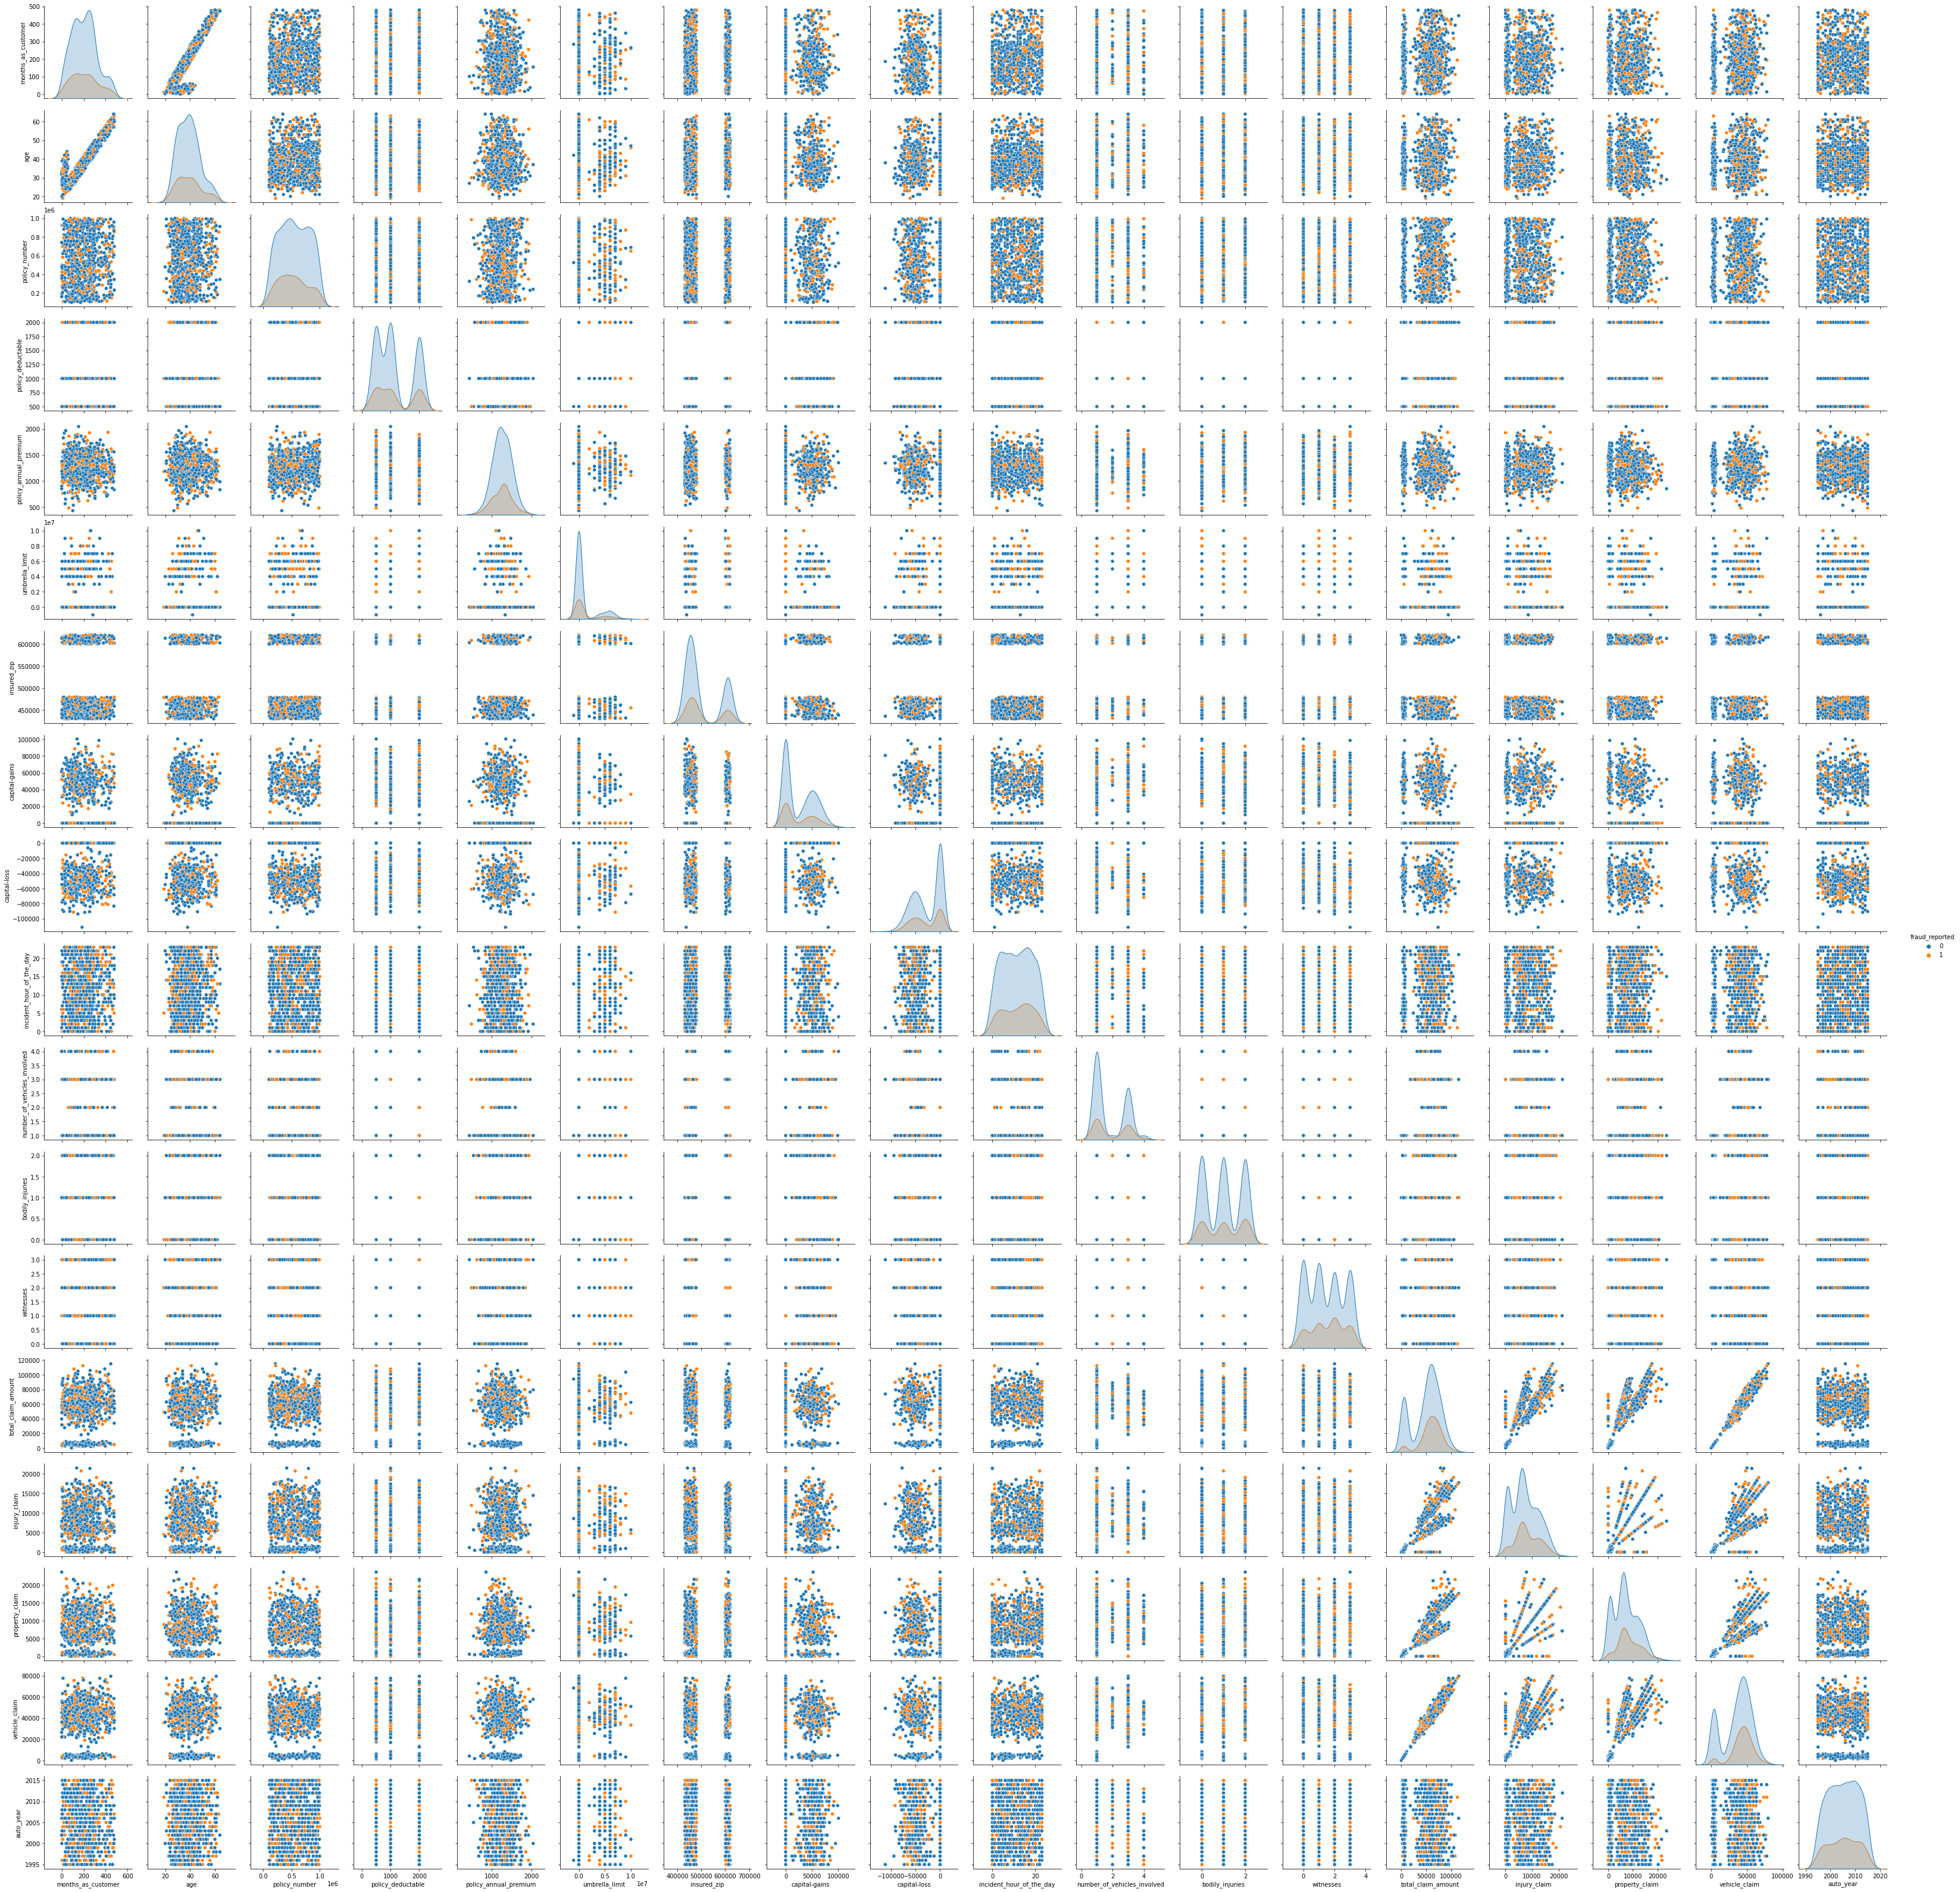

In [23]:
sns.pairplot(data, hue="fraud_reported")

#### <font  color = blue > Observations: </font>
* We can see some of the outliers in Months as customers column
* Months as customer and Age features follow near normal distribution with mean as 220 & 39 respectively.
* Customers who doesn't have umbrella limit were more doing frauds. 
* Customers who are in the age between 30-40 were most likely claiming fraud auto insurance claims
* No special relation observed for features like policy state, policy_csl, policy deductible, gender with respective to fraud claim.
* As per the data, customers having all level of education were registering fraud claims but Junior degree were bit on higher side.
* Most of the Incidents were happening in the night time.
* More fraud claims were registered in South Carolina state and New York states.
* Observed that the claims which doesn't have the policy report were most likely towards the fradulent claims
* Features like Policy Number, Policy bind date, insured zip, insured education level, insured occupation, incident city, incident location, auto make, auto model auto year were not contributing to target variable and hence dropped
* Features like Total claim, property claim, vehicle claim, injury claim were highly correlated independent features hence considering only total claim.

## <font  color = Purple > Step 3: Segregate data into training set and testing set </font>

In [24]:
#Perform Encoding techniques to convert the String to Numeric
le = preprocessing.LabelEncoder()
data['policy_state'] = le.fit_transform(data['policy_state'])
data['policy_csl'] = le.fit_transform(data['policy_csl'])
data['police_report_available'] = le.fit_transform(data['police_report_available'])
data['insured_sex'] =le.fit_transform(data['insured_sex'])
data['incident_type'] =le.fit_transform(data['incident_type'])
data['collision_type'] =le.fit_transform(data['collision_type'])
data['incident_severity'] =le.fit_transform(data['incident_severity'])
data['authorities_contacted'] =le.fit_transform(data['authorities_contacted'])
data['incident_state'] =le.fit_transform(data['incident_state'])
data['property_damage'] =le.fit_transform(data['property_damage'])

In [25]:
data = data.drop(columns = ['policy_number','policy_bind_date','insured_zip','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','incident_city','incident_location','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year'])
x_data = data.drop(columns = ['fraud_reported'], axis = 1)
y_data = data['fraud_reported']

print("The shape of x_data is", x_data.shape)
print("The shape of y_data is", y_data.shape)

The shape of x_data is (900, 22)
The shape of y_data is (900,)


In [26]:
#Splitting the data in training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.3, random_state = 40)
print("The shape of x_training_data is", x_train.shape)
print("The shape of y_training_data is", y_train.shape)
print("The shape of x_test_data is", x_test.shape)
print("The shape of y_test_data is", y_test.shape)

The shape of x_training_data is (630, 22)
The shape of y_training_data is (630,)
The shape of x_test_data is (270, 22)
The shape of y_test_data is (270,)


In [27]:
x_data.head()

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48             2           1               1000   
1                 228   42             1           1               2000   
2                 134   29             2           0               2000   
3                 256   41             0           1               2000   
4                 228   44             0           2               1000   

   policy_annual_premium  umbrella_limit  insured_sex  capital-gains  \
0                1406.91               0            1          53300   
1                1197.22         5000000            1              0   
2                1413.14         5000000            0          35100   
3                1415.74         6000000            0          48900   
4                1583.91         6000000            1          66000   

   capital-loss         ...          incident_severity  authorities_contacted  \
0             0         ...                          0                      4   
1             0         ...                          1                      4   
2             0         ...                          1                      4   
3        -62400         ...                          0                      4   
4        -46000         ...                          1                      2   

   incident_state  incident_hour_of_the_day  number_of_vehicles_involved  \
0               4                         5                            1   
1               5                         8                            1   
2               1                         7                            3   
3               2                         5                            1   
4               1                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                2                1          2                        2   
1                1                0          0                        1   
2                0                2          3                        0   
3                1                1          2                        0   
4                0                0          1                        0   

   total_claim_amount  
0               71610  
1                5070  
2               34650  
3               63400  
4                6500  

[5 rows x 22 columns]

## <font  color = Purple > Step 4: Select appropriate algorithm </font>

In [28]:
#Naive Bayes Algorithm
nbclf = GaussianNB()
nbclf.fit(x_train, y_train)
print('Accuracy of Naive Bayes Classifier Model is {}'.format(nbclf.score(x_test, y_test)))

Accuracy of Naive Bayes Classifier Model is 0.7148148148148148


In [29]:
#Decision Tree Algorithm 
dtclf = DecisionTreeClassifier(random_state = 40)
dtclf.fit(x_train, y_train)
print('Accuracy of Decision Tree Classifier Model  is {}'.format(dtclf.score(x_test, y_test)))

Accuracy of Decision Tree Classifier Model  is 0.674074074074074


In [30]:
#Random Forest Algorithm 
rfclf = RandomForestClassifier(random_state = 40)
rfclf.fit(x_train,y_train)
print('Accuracy of Random Forest Classifier Model is {}'.format(rfclf.score(x_test, y_test)))

Accuracy of Random Forest Classifier Model is 0.7185185185185186


In [31]:
#SVM Algorithm
svmclf = SVC(kernel='rbf')
svmclf.fit(x_train,y_train)
print('Accuracy of SVM Classifier Model is {}'.format(svmclf.score(x_test, y_test)))

Accuracy of SVM Classifier Model is 0.7074074074074074


In [32]:
#Adaboost Classification Algorithm
abclf = AdaBoostClassifier(n_estimators=100,random_state = 40)
abclf.fit(x_train,y_train)
print('Accuracy of Random Forest Classifier Model is {}'.format(rfclf.score(x_test, y_test)))

Accuracy of Random Forest Classifier Model is 0.7185185185185186


In [33]:
#XGBoost Algorithm
xbclf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,max_depth=1, random_state = 40)
xbclf.fit(x_train,y_train)
print('Accuracy of Random Forest Classifier Model is {}'.format(rfclf.score(x_test, y_test)))

Accuracy of Random Forest Classifier Model is 0.7185185185185186


## <font  color = Purple > Step 4a: Hyperparameter Optimization </font>

In [34]:
#Choosing the Best Hyperparameters for Random Forest Classification Algorithm
param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": [1,2,3,4,5,6,7,8,9,10],
    "max_features":[2,4,6,8,10,12,14,16,18,20,22],
    "n_estimators" :[100,200,300]
}

rfclf = RandomForestClassifier(random_state =40)
rfs = GridSearchCV(estimator = rfclf, param_grid = param_dist,cv = 3, n_jobs = -2, verbose = 2)
rfs.fit(x_train,y_train)
rfs.best_params_

Fitting 3 folds for each of 660 candidates, totalling 1980 fits


[Parallel(n_jobs=-2)]: Done  35 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-2)]: Done 156 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-2)]: Done 359 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-2)]: Done 642 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-2)]: Done 1007 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-2)]: Done 1452 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-2)]: Done 1980 out of 1980 | elapsed: 11.8min finished


{'criterion': 'gini', 'max_depth': 3, 'max_features': 14, 'n_estimators': 100}

#### <font  color = blue > Observations: </font>
* As discussed in the paper, build Naive Bayes, Decision Tree and Random Forest Models.
* Among these 3, Random forest model is providng the high accuracy.
* Performed Cross Validation to find the best hyperparameters for Random forest to improve the accuarcy and accuarcy has improved around 5% which will be definitely significant improvement in real world.
* Additionally, also build SVM, Adaboost and XGBoost models in which Adaboost and XGBoost is also giving the same accuracy as Random Forest. 
#### As discussed in the paper, considering the Random Forest Model with the best hyperparameters for Training & Evaluating the model performance.

## <font  color = Purple > Step 5: Execute algorithm with training data </font>

In [35]:
#Random Forest Algorithm with the best hyperparameters
rfclf = RandomForestClassifier(n_estimators = 200,criterion = "gini", max_depth = 3, max_features = 20)
rfclf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## <font  color = Purple > Step 6: Evaluate algorithm with testing data </font>

In [36]:
y_pred = rfclf.predict(x_test)
print('Accuracy of Random Forest Classifier Model is {}\n'.format(rfclf.score(x_test, y_test)))
print(classification_report(y_test,y_pred))

Accuracy of Random Forest Classifier Model is 0.7703703703703704

             precision    recall  f1-score   support

          0       0.84      0.83      0.84       191
          1       0.60      0.62      0.61        79

avg / total       0.77      0.77      0.77       270



## <font  color = Purple > Step 7: Satisfactory, use the classifier for new dataset</font>

In [37]:
# Loading New Data  
data1 = pd.read_csv('C:/Users/PAVAN REDDY BATTULA/Desktop/UNH/Spring -2022/Machine Learning/Canvas/Project/New_Claims1.csv')
data1 = pd.DataFrame(data1)
print("The Top 5 records is shown below ")
data1.head()

The Top 5 records is shown below 


months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   1   33           OH    250/500               2000   
1                   5   21           IN    250/500                500   
2                  64   28           IL   500/1000               1000   
3                 142   30           IN   500/1000                500   
4                  97   27           OH   500/1000                500   

   policy_annual_premium  umbrella_limit insured_sex  capital-gains  \
0                1391.63               0        MALE          61200   
1                 915.41         5000000      FEMALE              0   
2                1468.82               0        MALE          56800   
3                1412.76               0        MALE          66400   
4                1588.26               0      FEMALE          56700   

   capital-loss         ...         incident_severity authorities_contacted  \
0             0         ...                Total Loss                 Other   
1             0         ...                Total Loss                Police   
2        -51800         ...              Minor Damage                  Fire   
3        -63700         ...              Minor Damage                 Other   
4        -49300         ...                Total Loss                 Other   

  incident_state incident_hour_of_the_day number_of_vehicles_involved  \
0             NY                       23                           1   
1             NY                       23                           1   
2             SC                        9                           3   
3             WV                       22                           1   
4             VA                       22                           3   

   property_damage  bodily_injuries witnesses  police_report_available  \
0              YES                0         3                       NO   
1              YES                0         0                       NO   
2               NO                2         1                       NO   
3              YES                2         3                       NO   
4              YES                2         1                      YES   

   total_claim_amount  
0               69400  
1               40500  
2               60000  
3               67320  
4               75690  

[5 rows x 22 columns]

In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
months_as_customer             100 non-null int64
age                            100 non-null int64
policy_state                   100 non-null object
policy_csl                     100 non-null object
policy_deductable              100 non-null int64
policy_annual_premium          100 non-null float64
umbrella_limit                 100 non-null int64
insured_sex                    100 non-null object
capital-gains                  100 non-null int64
capital-loss                   100 non-null int64
incident_type                  100 non-null object
collision_type                 100 non-null object
incident_severity              100 non-null object
authorities_contacted          100 non-null object
incident_state                 100 non-null object
incident_hour_of_the_day       100 non-null int64
number_of_vehicles_involved    100 non-null int64
property_damage                100 n

In [39]:
#Replacing '?' value with 'No information' rather than deleting or imputing with mode for features collision type,
#property damage and police report available.
#Imputing with mode will may lead to wrong information so decided to create a new category which will be more appropirate for 
#model building`
data1['collision_type'] = ['No Information' if i=='?' else i for i in data1['collision_type']]
data1['property_damage'] = ['No Information' if i=='?' else i for i in data1['property_damage']]
data1['police_report_available'] = ['No Information' if i=='?' else i for i in data1['police_report_available']]

In [40]:
#Perform Encoding techniques to convert the String to Numeric
le = preprocessing.LabelEncoder()
data1['policy_state'] = le.fit_transform(data1['policy_state'])
data1['policy_csl'] = le.fit_transform(data1['policy_csl'])
data1['police_report_available'] = le.fit_transform(data1['police_report_available'])
data1['insured_sex'] =le.fit_transform(data1['insured_sex'])
data1['incident_type'] =le.fit_transform(data1['incident_type'])
data1['collision_type'] =le.fit_transform(data1['collision_type'])
data1['incident_severity'] =le.fit_transform(data1['incident_severity'])
data1['authorities_contacted'] =le.fit_transform(data1['authorities_contacted'])
data1['incident_state'] =le.fit_transform(data1['incident_state'])
data1['property_damage'] =le.fit_transform(data1['property_damage'])

In [41]:
y_pred1 = rfclf.predict(data1)

In [42]:
print('The predictions of new data are:',y_pred1)

The predictions of new data are: [0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0
 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0]


### <font  color = green > Conclusion:</font>
#### <font  color = green > The Model is developed successfully to detect the Auto Insurance Fraud claims. This helps the Insurance companies to save huge amount of Money and Time.

#### <font  color = green > Used Naive Bayes, Decision Tree, Random Forest Classifiers as discussed in Research Paper. Additionally Implemented SVM, Adaboost and XGBoost Classifiers. Since Research Paper focused on Naive, Decision Tree and Random Forest, performed hyperparameter tuning to find the best parameters for Random Forest Classifier which gives the high accuracy. 

#### <font  color = green > Random Forest Classifier gives most balanced performance with:

* Accuracy Score = 76.67%
* Precision = 76%
* Recall = 77%
* F1 Score = 77%

#### <font  color = green >Having more False Positive rate decrease precision (Impact on customer retention & satisfaction) and having more False Negative rate decrease recall (Impact financial loss) which are risks for Insurance companies.  Insurance companies should consider F1 score as their model performance metric as False Positive & False Negative should both are important factors.   
